ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

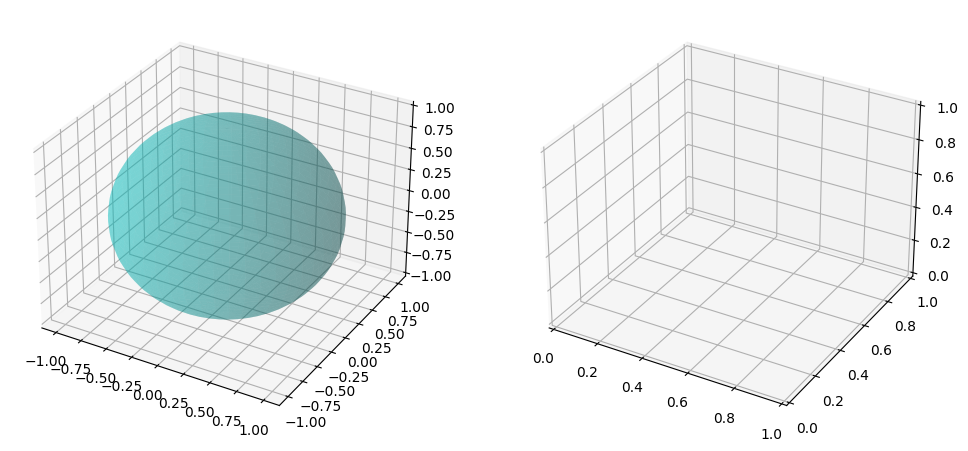

In [3]:
#a 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])


def stereographic_projection(x, y, z):
    x_proj = x / (1 - z)
    y_proj = y / (1 - z)
    return x_proj, y_proj


def generate_sphere_mesh(n=50):
    theta = np.linspace(0, np.pi, n)
    phi = np.linspace(0, 2 * np.pi, n)
    theta, phi = np.meshgrid(theta, phi)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z

def plot_sphere_and_projection():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})
    ax1, ax2 = axes
    
    #sphere mesh
    x, y, z = generate_sphere_mesh()
    
    #plot sphere
    ax1.plot_surface(x, y, z, color='c', alpha=0.3)
    
    #plot curves on sphere
    phi_vals = np.linspace(0, 2*np.pi, 100)
    theta1 = np.pi / 4
    theta2 = np.pi / 2
    curve1 = spherical_to_cartesian(1, theta1, phi_vals)
    curve2 = spherical_to_cartesian(1, theta2, phi_vals)
    ax1.plot(curve1[0], curve1[1], curve1[2], 'r', label='Curve 1')
    ax1.plot(curve2[0], curve2[1], curve2[2], 'b', label='Curve 2')
    ax1.legend()
    ax1.set_title('Unit Sphere with Curves')
    
    #stereographic projection
    proj_curve1 = stereographic_projection(curve1[0], curve1[1], curve1[2])
    proj_curve2 = stereographic_projection(curve2[0], curve2[1], curve2[2])
    
    # plot projected curves
    ax2.plot(proj_curve1[0], proj_curve1[1], 'r', label='Projected Curve 1')
    ax2.plot(proj_curve2[0], proj_curve2[1], 'b', label='Projected Curve 2')
    ax2.legend()
    ax2.set_title('Stereographic Projection')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')

    proj_x1, proj_y1 = stereographic_projection(curve1[0], curve1[1], curve1[2])
    proj_x2, proj_y2 = stereographic_projection(curve2[0], curve2[1], curve2[2])

    ax2.plot(proj_x1, proj_y1, 'r', label='Projected Curve 1')
    ax2.plot(proj_x2, proj_y2, 'b', label='Projected Curve 2')

    plt.show()

#plot stereographic projection and check angle preservation
plot_sphere_and_projection()


/tmp/ipykernel_24503/2369663120.py:8: RuntimeWarning: divide by zero encountered in divide
  x_proj = x / (1 - z)
/tmp/ipykernel_24503/2369663120.py:8: RuntimeWarning: invalid value encountered in divide
  x_proj = x / (1 - z)
/tmp/ipykernel_24503/2369663120.py:9: RuntimeWarning: invalid value encountered in divide
  y_proj = y / (1 - z)
/tmp/ipykernel_24503/2369663120.py:9: RuntimeWarning: divide by zero encountered in divide
  y_proj = y / (1 - z)


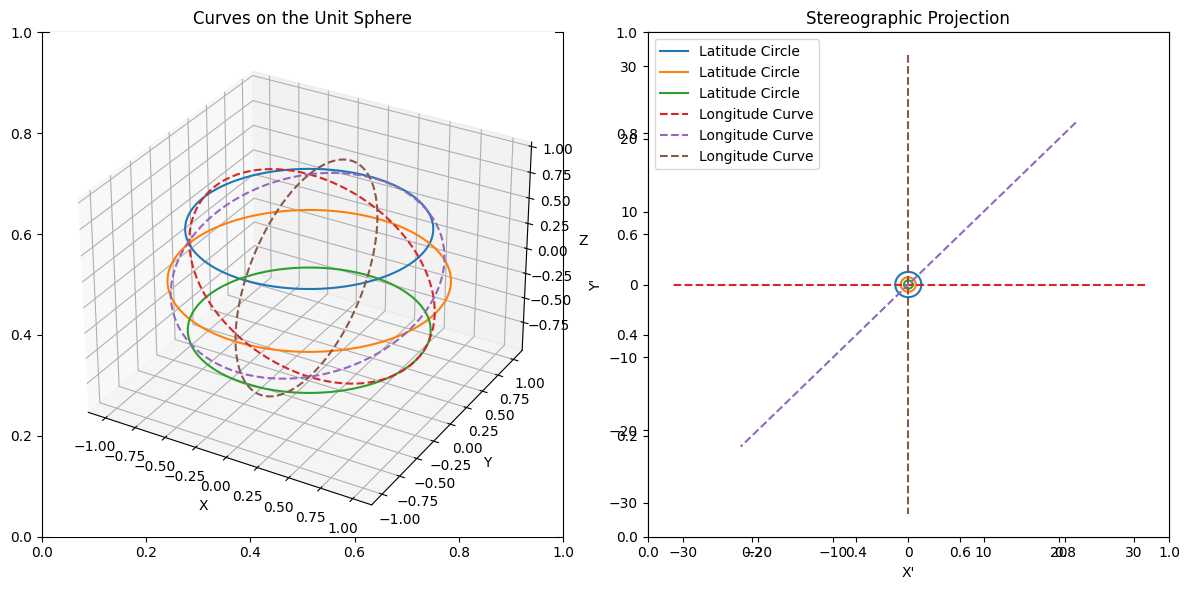

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def stereographic_projection(x, y, z):
    """Applies the stereographic projection from the unit sphere onto the XY plane."""
    x_proj = x / (1 - z)
    y_proj = y / (1 - z)
    return x_proj, y_proj

#horizontal Slices
theta = np.linspace(0, 2*np.pi, 100)  
z_levels = [0.5, 0.0, -0.5]  

latitudes = []
latitudes_proj = []
for z in z_levels:
    r = np.sqrt(1 - z**2)  
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    latitudes.append((x, y, np.full_like(x, z)))
    
    #applies the stereographic projection
    x_proj, y_proj = stereographic_projection(x, y, z)
    latitudes_proj.append((x_proj, y_proj))

#vertical Slices
phi_levels = [0, np.pi/4, np.pi/2]  
longitudes = []
longitudes_proj = []

for phi in phi_levels:
    x = np.cos(phi) * np.sin(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(theta)
    longitudes.append((x, y, z))
    
    
    x_proj, y_proj = stereographic_projection(x, y, z)
    longitudes_proj.append((x_proj, y_proj))

#plots the curves before and after stereographic projection
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': None})

#3D Plot
ax1 = fig.add_subplot(121, projection='3d')
for x, y, z in latitudes:
    ax1.plot(x, y, z, label="Latitude Circle")
for x, y, z in longitudes:
    ax1.plot(x, y, z, label="Longitude Curve", linestyle='dashed')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("Curves on the Unit Sphere")

#2D Plot
ax2 = fig.add_subplot(122)
for x_proj, y_proj in latitudes_proj:
    ax2.plot(x_proj, y_proj, label="Latitude Circle")
for x_proj, y_proj in longitudes_proj:
    ax2.plot(x_proj, y_proj, label="Longitude Curve", linestyle='dashed')
ax2.set_xlabel("X'")
ax2.set_ylabel("Y'")
ax2.set_title("Stereographic Projection")
ax2.legend()

plt.tight_layout()
plt.show()


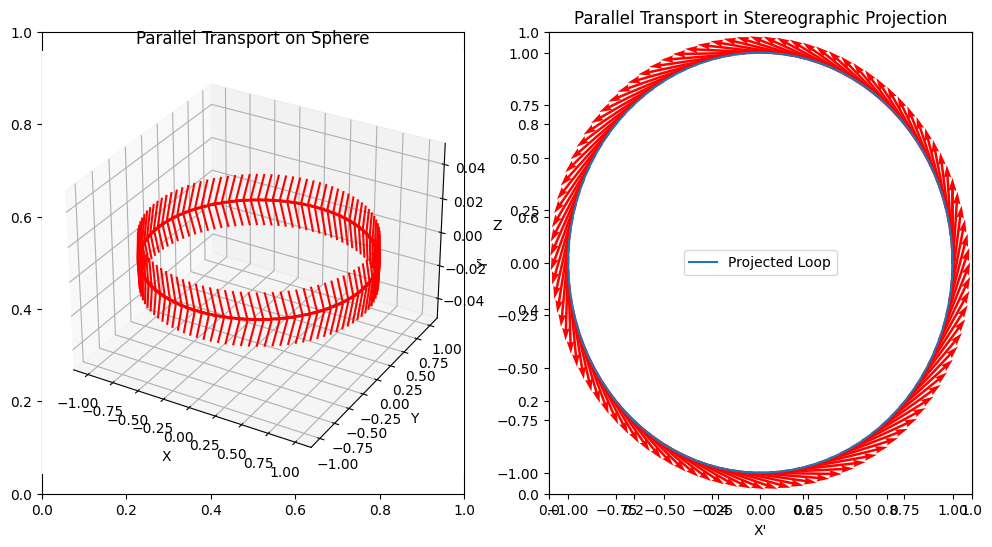

In [6]:
#c 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def stereographic_projection(x, y, z):
    """Applies stereographic projection from the unit sphere onto the XY plane."""
    x_proj = x / (1 - z)
    y_proj = y / (1 - z)
    return x_proj, y_proj

#dsefine the closed loop circle
t = np.linspace(0, 2 * np.pi, 100)  
x = np.cos(t)
y = np.sin(t)
z = np.zeros_like(t) 

#defines initial tangent vector
v_x0, v_y0, v_z0 = 0, 0, 1  

#Parallel transport
v_x = -np.sin(t)
v_y = np.cos(t)
v_z = np.zeros_like(t)

#applies stereographic projection
x_proj, y_proj = stereographic_projection(x, y, z)
vx_proj, vy_proj = stereographic_projection(v_x, v_y, v_z)

#plot the transport on the sphere
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': None})

# 3D Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x, y, z, label="Closed Loop (Great Circle)")
ax1.quiver(x, y, z, v_x, v_y, v_z, color='red', length=0.2, normalize=True)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("Parallel Transport on Sphere")

# 2D Plot
ax2 = fig.add_subplot(122)
ax2.plot(x_proj, y_proj, label="Projected Loop")
ax2.quiver(x_proj, y_proj, vx_proj, vy_proj, color='red', scale=5)
ax2.set_xlabel("X'")
ax2.set_ylabel("Y'")
ax2.set_title("Parallel Transport in Stereographic Projection")
ax2.legend()

plt.show()


/tmp/ipykernel_24503/84154409.py:10: RuntimeWarning: invalid value encountered in divide
  x_proj = x / denom
/tmp/ipykernel_24503/84154409.py:11: RuntimeWarning: invalid value encountered in divide
  y_proj = y / denom


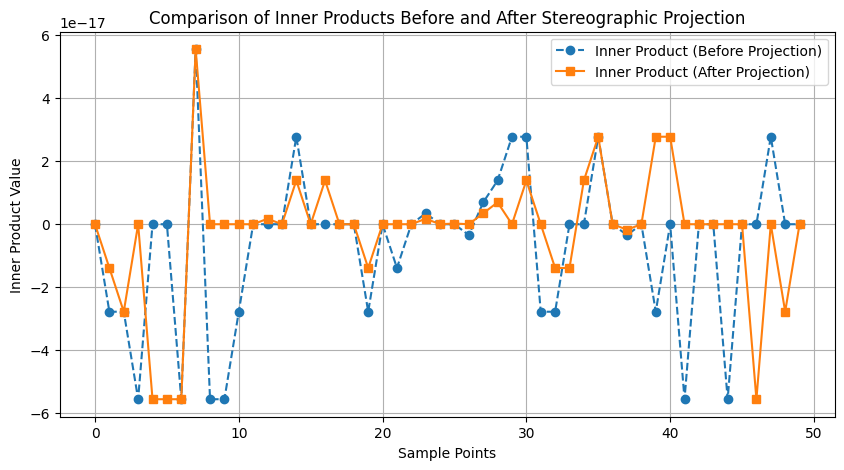

In [7]:
#d 

import numpy as np
import matplotlib.pyplot as plt


def stereographic_projection(x, y, z):
    """Applies stereographic projection from the unit sphere onto the XY plane."""
    denom = (1 - z)
    x_proj = x / denom
    y_proj = y / denom
    return x_proj, y_proj

#generates random points on the unit sphere
n_points = 50
theta = np.linspace(0, 2*np.pi, n_points)  
phi = np.linspace(0, np.pi, n_points)  

#generates random points on the sphere
x = np.cos(theta) * np.sin(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(phi)

#generates two random tangent vectors at each point
v1_x = -np.sin(theta)  
v1_y = np.cos(theta)
v1_z = np.zeros_like(v1_x)

v2_x = np.cos(theta) * np.cos(phi)  
v2_y = np.sin(theta) * np.cos(phi)
v2_z = -np.sin(phi)

#inner products
inner_product_before = v1_x * v2_x + v1_y * v2_y + v1_z * v2_z


x_proj, y_proj = stereographic_projection(x, y, z)
v1_x_proj, v1_y_proj = stereographic_projection(v1_x, v1_y, v1_z)
v2_x_proj, v2_y_proj = stereographic_projection(v2_x, v2_y, v2_z)

#inner products after projection
inner_product_after = v1_x_proj * v2_x_proj + v1_y_proj * v2_y_proj


plt.figure(figsize=(10, 5))

plt.plot(inner_product_before, label="Inner Product (Before Projection)", linestyle='--', marker='o')
plt.plot(inner_product_after, label="Inner Product (After Projection)", linestyle='-', marker='s')

plt.xlabel("Sample Points")
plt.ylabel("Inner Product Value")
plt.title("Comparison of Inner Products Before and After Stereographic Projection")
plt.legend()
plt.grid()
plt.show()


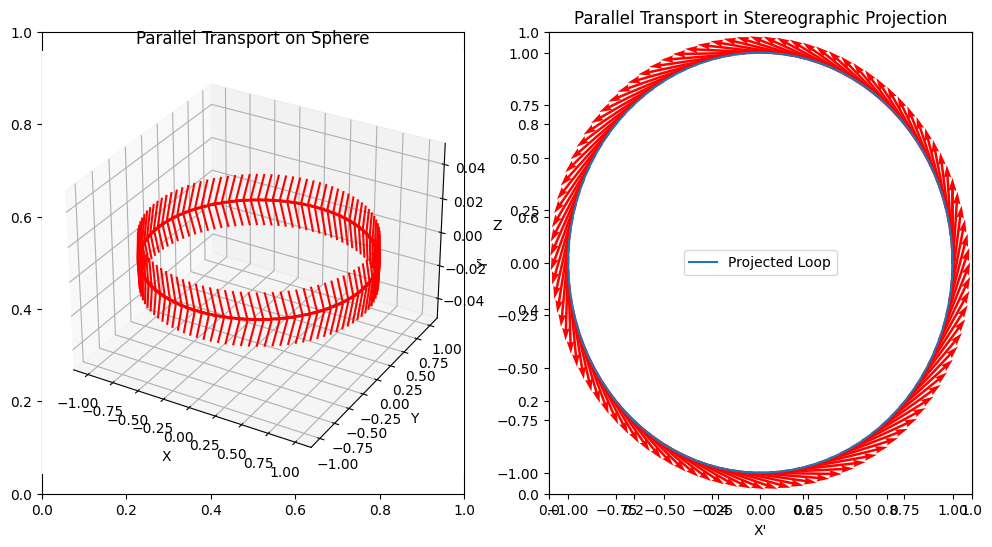

Final vector after transport: (2.4492935982947064e-16, 1.0, 0.0)


In [8]:
#f 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def stereographic_projection(x, y, z):
    """Applies stereographic projection from the unit sphere onto the XY plane."""
    denom = 1 - z
    x_proj = x / denom
    y_proj = y / denom
    return x_proj, y_proj

#defines the loop a great circle which is unit-speed parametrized 
t = np.linspace(0, 2 * np.pi, 100)  
x = np.cos(t)
y = np.sin(t)
z = np.zeros_like(t)  

#parallel transport
v_x = -np.sin(t)
v_y = np.cos(t)
v_z = np.zeros_like(t)

#Computes the final vector after one full loop
final_vector = (v_x[-1], v_y[-1], v_z[-1])


x_proj, y_proj = stereographic_projection(x, y, z)
vx_proj, vy_proj = stereographic_projection(v_x, v_y, v_z)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x, y, z, label="Loop (Great Circle)")
ax1.quiver(x, y, z, v_x, v_y, v_z, color='red', length=0.2, normalize=True)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("Parallel Transport on Sphere")


ax2 = fig.add_subplot(122)
ax2.plot(x_proj, y_proj, label="Projected Loop")
ax2.quiver(x_proj, y_proj, vx_proj, vy_proj, color='red', scale=5)
ax2.set_xlabel("X'")
ax2.set_ylabel("Y'")
ax2.set_title("Parallel Transport in Stereographic Projection")
ax2.legend()

plt.show()

#Prints final vector to check if holonomy is preserved
print(f"Final vector after transport: {final_vector}")
#does not change